<a href="https://colab.research.google.com/github/m-numan1/100-Deep-Learning-Projects/blob/main/mnist_digit_classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Mnist Digit Classification Model in Pytorch

**Steps TO Follow**
 * We will use mnist dataset from torch vision
 * Create DataLoader
 * Model Class
 * Training Loop
 * Evaluation Loop

In [2]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F

In [3]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [4]:
train_data = MNIST(root = 'data', download = True, train= True,transform = transforms.ToTensor())
test_data = MNIST(root = 'data', download = True, train= False,transform = transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.14MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.22MB/s]


In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
# DataLoader is a class object that provide data in batches
train_loader = DataLoader(train_data , batch_size = 100, shuffle = True)
test_loader = DataLoader(test_data , batch_size = 100 , shuffle = True)

In [7]:
# Creating neuaral NetWork
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.con1 = nn.Conv2d(1 , 32, kernel_size = 3)
    self.con2 = nn.Conv2d(32, 64 , kernel_size = 3)
    self.pool = nn.MaxPool2d(2, 2)  # Output: 12x12
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)  # 10 classes
  def forward(self, x):
    x = F.relu(self.con1(x))
    x= F.relu(self.con2(x))
    x = self.pool(x)           # Max pooling to downsample
    x = x.view(x.size(0), -1)  # Flatten the tensor (batch_size, 9216)
    x = F.relu(self.fc1(x))    # Fully connected layer 1 + ReLU
    x = self.fc2(x)            # Final layer → class logits
    return x


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [9]:


epochs = 100
learning_rate = 0.01

model = CNNModel()
model.to(device)
optimizer = optim.Adam(model.parameters() , lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [10]:
# Training Loop

for epoch in range(epochs):
  total_loss = 0
  for images , labels in train_loader:
    batch_image, batch_label = images.to(device), labels.to(device)
    optimizer.zero_grad()

    output = model(batch_image)

    loss = loss_fn(output , batch_label)

    loss.backward()

    optimizer.step()

    total_loss =total_loss + loss.item()
  print(total_loss)


88.92028887989
33.16794224688783
25.448408897733316
22.898608969662746
18.074061638108105
16.56116285065218
15.958765298228172
14.465392955752577
16.412817653766297
15.23131720537026
11.453242300675925
14.27321280721253
14.142188384785413
14.445294015866693
11.218582009533314
15.463787428337334
14.989468513555682
12.259249762216646
8.178553187011676
21.793528039165377
12.522006840114921
7.56896191191662
13.103324769778927
16.195013135256907
24.936608386789498
13.651702555504395
13.615083948790655
12.50936560850665
14.112819064729676
19.875236971530907
8.918786404142292
6.3075135918125955
24.50510115747672
22.63818433773539
12.751817228934126
8.233592778079208
13.82398804574641
20.525840816042056
14.540587938855829
18.251060616840103
17.319145550295723
16.063207156669634
14.931985278571565
18.26145375530914
20.66341079027237
12.927935606685692
27.502866881371972
16.639178339656993
14.197382175625622
18.796900807737575
28.359117039588593
17.394942263443397
14.449978100696189
16.827234720

In [11]:
model.eval()

CNNModel(
  (con1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (con2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
# Evaluating

with torch.no_grad():

  correct = 0
  total = 0
  for image, label in test_loader:

    image , label = image.to(device) , label.to(device)

    output = model(image)

    _, predicted = torch.max(output.data, 1)

    total += label.size(0)

    correct += (predicted == label).sum().item()

  print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 98 %


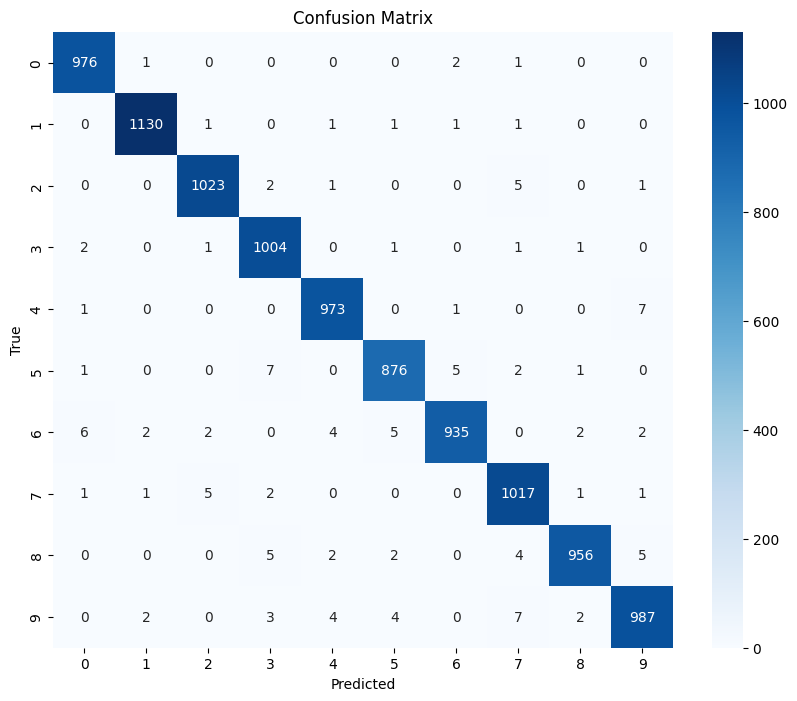

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Collect all true and predicted labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
